(tir-target)=
# Total Internal Reflection
Waveguides guide light based on the principles of *total internal reflection*.

The indices of refraction for the core material and cladding material of a waveguide are chosen such that *total internal reflection* is achieved for a specific optical frequency. When a light wave propagating in a first material strikes a second material, a portion of the light wave reflects off the boundary between the first and second material, while the rest of the light wave goes through the boundary. The portion of the light wave that reflects off the boundary is called the *reflected wave*, and the portion that goes through the boundary is called the *transmitted wave*.

(ke1-target)=
## Key Equations

The magnitude of the reflected and transmitted waves, along with the angles of reflection and transmission, are dependent on the refractive indices of the two materials, along with the incident angle of the light wave. The angles of reflection and transmission (also known as refraction) can be determined using Snell's law. The magnitudes of the reflected and transmitted waves are the products of the incident wave magnitude and the reflection and transmission coefficients respectively. The reflection and transmission coefficients can be calculated using the Fresnel Equations.

:::{note}
Law of Reflection:
\begin{gather*}
\theta_i = \theta_r
\end{gather*}

Snell's Law of Refraction:
\begin{gather*}
n_1sin(\theta_i) = n_2sin(\theta_t)
\end{gather*}

Reflection and Transmission Coefficients (Transverse Electric Case):
\begin{gather*}
\Gamma_{TE} = \frac{n_1cos(\theta_i) - n_2cos(\theta_t)}{n_1cos(\theta_i) + n_2cos(\theta_t)} \\
\tau_{TE} = \frac{2n_1cos(\theta_i)}{n_1cos(\theta_i) + n_2cos(\theta_t)}
\end{gather*}

Reflection and Transmission Coefficients (Transverse Magnetic Case):
\begin{gather*}
\Gamma_{TM} = \frac{n_2cos(\theta_i) - n_1cos(\theta_t)}{n_2cos(\theta_i) + n_1cos(\theta_t)} \\
\tau_{TM} = \frac{2n_1cos(\theta_i)}{n_2cos(\theta_i) + n_1cos(\theta_t)}
\end{gather*}
:::
<br />

(rar-target)=
## Reflection and Refraction Demo

The python code below demonstrates the principle of oblique reflection and transmission. The red vector represents the propagation of the incident wave. The green vector represents the propagation of the reflected wave, and the blue vector represents the propagation of the transmitted wave. The refractive indices of the first and second material are set to 3.47 (the refractive index of silicon) and 1.44 (the refractive index of silicon dioxide). These indices correspond to the indices of refraction for an SOI waveguide. The boundary between the two materials is represented by the vertical line at x = 0. Material 1 is represented by the area left of the boundary line, and material 2 is represented by the area right of the boundary line. Observe how the reflected and transmitted wave vectors change with incident angles of 10 degrees, 15 degrees, 20 degrees, and 25 degrees.

If you'd like, copy the code and experiment by calling the simulation function with different angles of incidence, or by changing the refractive indices n1 and n2. 

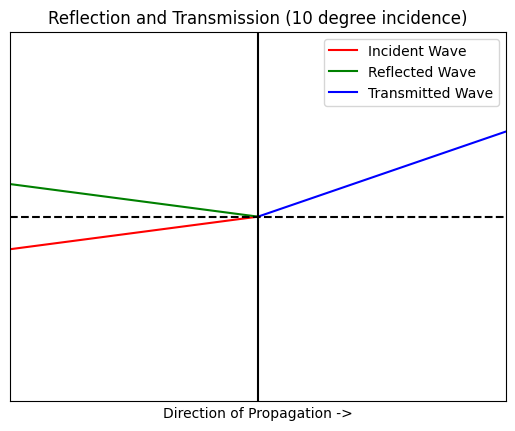

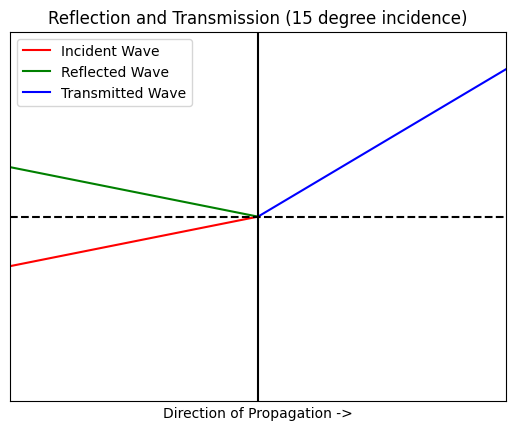

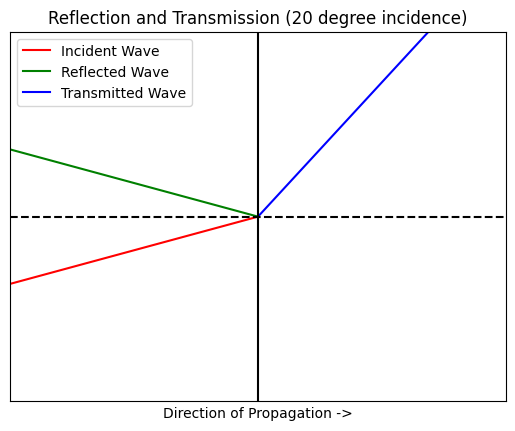

/var/folders/9n/_g8r69x957zb59c09f92zznh0000gn/T/ipykernel_69883/921879874.py:17: RuntimeWarning: invalid value encountered in arcsin
  transmitted_angle = np.arcsin((n1 * np.sin(incident_angle_radians)) / n2)


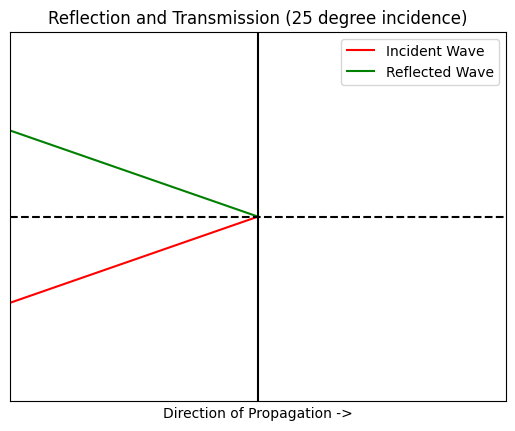

In [ ]:
### REFLECTION AND REFRACTION DEMO ###

import numpy as np
import matplotlib.pyplot as plt

#function takes an incident angle in degrees
def simulate_reflection(angle):
  #Convert incident angle to radians
  incident_angle_radians = np.deg2rad(angle)
  
  #Define indices of refraction for material 1 and material 2
  n1 = 3.47
  n2 = 1.44

  #Calculate the reflected and transmitted angles
  reflected_angle = -1 * incident_angle_radians
  transmitted_angle = np.arcsin((n1 * np.sin(incident_angle_radians)) / n2)

  #Create vectors for the incident wave, reflected wave, and transmitted wave
  incident_wave = np.array([-5, -5 * np.tan(incident_angle_radians)])
  reflected_wave = np.array([-5, -5 * np.tan(reflected_angle)])
  transmitted_wave = np.array([5, 5 * np.tan(transmitted_angle)])

  #Critical Angle Calculation
  display_transmitted = True
  if incident_angle_radians > np.arcsin(n2/n1):
      display_transmitted = False

  #Create Plot
  fig, axis = plt.subplots()

  #Add vectors to plot
  axis.plot([incident_wave[0],0],[incident_wave[1],0],color='red', label='Incident Wave')
  axis.plot([reflected_wave[0],0],[reflected_wave[1],0],color='green', label='Reflected Wave')
  if display_transmitted:
    axis.plot([0,transmitted_wave[0]],[0,transmitted_wave[1]],color='blue', label='Transmitted Wave')

  #Add barriers to plot
  axis.axvline(0,color='black')
  axis.axhline(0,color='black', linestyle ='--')

  #Window, label, and display plot
  axis.set_xlim([-5, 5])
  axis.set_ylim([-5, 5])
  axis.set_xlabel('Direction of Propagation ->')
  plt.xticks([])
  plt.yticks([])
  name = "Reflection and Transmission (" + str(angle) + " degree incidence)"
  axis.set_title(name)
  axis.legend()
  plt.show()

simulate_reflection(10)
simulate_reflection(15)
simulate_reflection(20)
simulate_reflection(25)

(ca-target)=
## Critical Angles

Notice the output when the incident angle is set to 25 degrees, we get this runtime warning: "invalid value encountered in arcsin." The angle of the transmitted wave is dependent upon the ratio of the two indices of refraction and the incident angle. Because the domain of the inverse sine function is -1 to 1, for arguments with values outside of this domain, the inverse sine function cannot resolve, and there *is no transmitted wave*. This is the case of total internal reflection.

Given indices of refraction, we can use a derivation of Snell's Law to determine which angles will result in total internal reflection. Any angle greater than the *critical angle* will result in total internal reflection. The critical angle equation is as follows:
\begin{gather*}
\theta_c = \sin^{-1}(\frac{n_{2}}{n_{1}})
\end{gather*}

Let's determine the critical angle for the demonstration above. The following code returns a critical angle given a first index of refraction and a second index of refraction.

In [ ]:
### CRITICAL ANGLE CALCULATOR ###

import numpy as np

#Returns the critical angle in degrees given a first and second index of refraction
def critical_angle(n1, n2):
    crit_angle = np.arcsin(n2/n1)
    return np.rad2deg(crit_angle)

critical_angle(3.47,1.44)

24.51840906945382

So for SOI waveguides, the critical angle is ~24.5 degrees. For any angle greater than 24.5 degrees, there will be no transmitted wave and total internal reflection will occur.

(poltw-target)=
## Propagation of Light Through a Waveguide

When a light wave propagates through a waveguide, each time the light wave strikes the boundary between the core and cladding material, total reflection will occur and all of the light wave will reflect back into the core material. This way, none of the light wave is "lost" transmitting through the cladding. The progagation of light through a waveguide can be profitably understood with the following picture.

TODO: Add a picture of light propagation through a waveguide

Of course, propagation of light through a waveguide isn't really *this* simple, but this model is intuitive enough for a basic understanding. 